In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn

from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics

In [39]:
dataframe = pd.read_csv("banking.csv")
dataframe

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [40]:
y = dataframe["y"]
df = dataframe.drop(["y"], axis=1)
numeric_columns = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
X = df[numeric_columns].copy()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

C:\Users\Лейва\Desktop\Projects\Project_7\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = LogReg.predict(X_test)

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10720,   261],
       [  829,   547]], dtype=int64)

<AxesSubplot: >

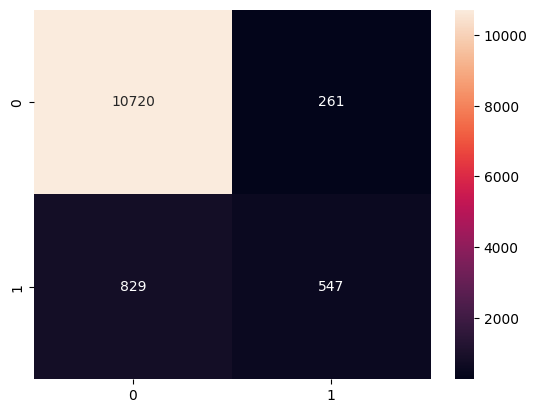

In [45]:
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [46]:
print(" Accuracy:",metrics.accuracy_score(y_test, y_pred))

 Accuracy: 0.9117908877559278


In [47]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.676980198019802


In [48]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.39752906976744184


In [49]:
print("F1:",metrics.f1_score(y_test, y_pred, average = None))

F1: [0.95162006 0.50091575]


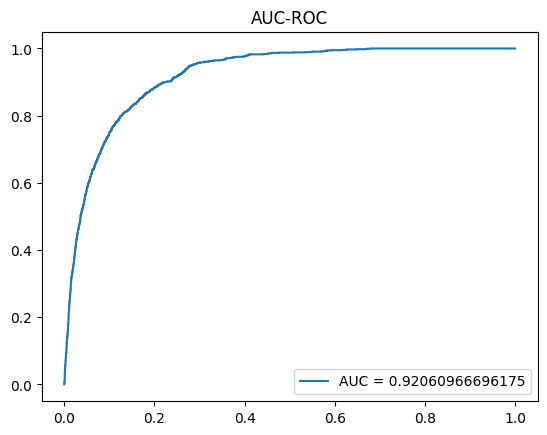

In [50]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC = "+str(auc))
plt.title("AUC-ROC")
plt.legend(loc=4)
plt.show()

**Metrics provide a an encouraging result.AUC-ROC indicates metrics were totally decent and the model is viable.**